<a href="https://colab.research.google.com/github/babupallam/Machine-Learning-ML-05--Model-Evaluation-and-Performace-Testing/blob/main/03_Evaluation_Metrics_for_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics for Regression Models



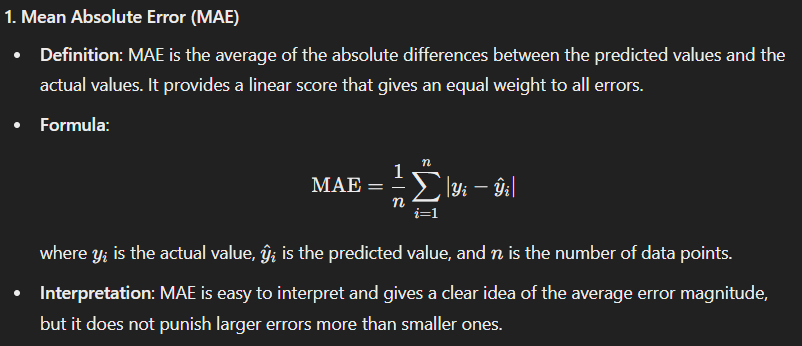

Characteristics and Properties of MAE
  - Interpretability: MAE is intuitive and easy to understand. It gives a clear indication of the average error magnitude.
  - Scale-Dependent: MAE is dependent on the scale of the data, meaning it is expressed in the same units as the target variable. This makes it useful for understanding the model's performance in practical terms.
  - Equal Weighting: MAE treats all errors equally, without giving extra penalty to larger errors, which can be a limitation in cases where larger errors are more significant to the problem being solved.
  - Robustness to Outliers: Compared to metrics like Mean Squared Error (MSE), MAE is more robust to outliers because it does not square the error terms. However, it can still be sensitive to significant outliers.

Comparison with Other Metrics

- MAE vs. MSE: While MSE squares the error terms, giving more weight to larger errors, MAE only takes the absolute difference. This makes MSE more sensitive to outliers. MAE, on the other hand, provides a linear error measure, which might be preferred in cases where outliers are not as important.
- MAE vs. RMSE: Root Mean Squared Error (RMSE) also involves squaring the error terms before taking the square root, combining the sensitivity of MSE to outliers with a return to the original unit of the target variable. MAE is generally easier to interpret but may not reflect the presence of larger errors as effectively as RMSE.

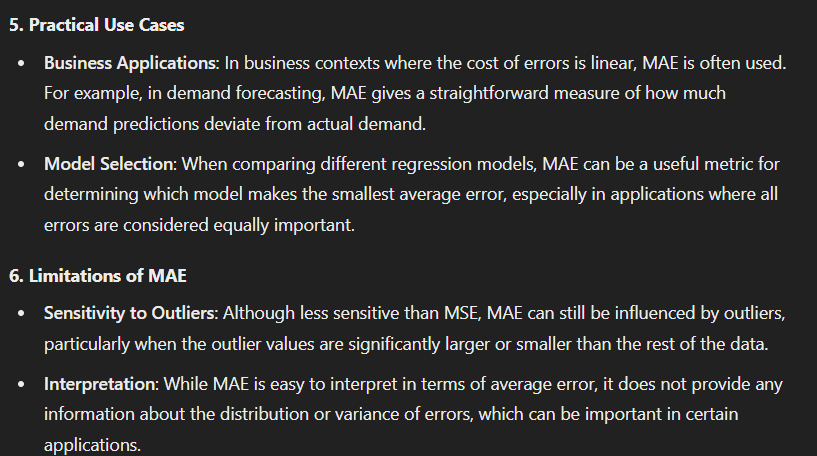

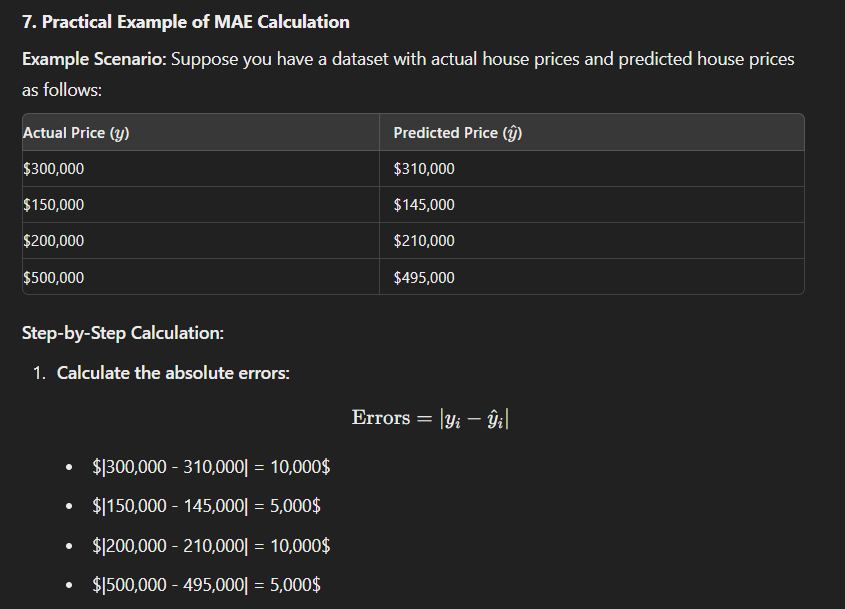

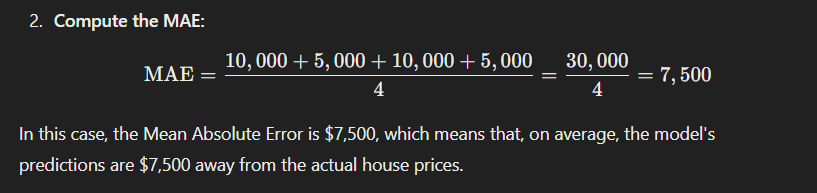



In [1]:
# Implementing MAE in Python

import numpy as np

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Example usage:
y_true = np.array([300000, 150000, 200000, 500000])
y_pred = np.array([310000, 145000, 210000, 495000])

error = mae(y_true, y_pred)
print(f"Mean Absolute Error: {error}")


Mean Absolute Error: 7500.0




---



---



---



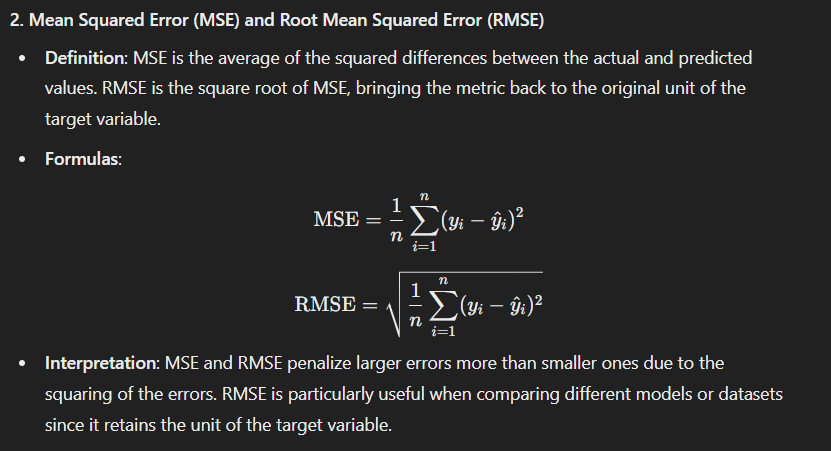

In [3]:
# Implement MSE using the following Python function:

import numpy as np

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [4]:
#mimplement RMSE:

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))


## Comparison between MAE, MSE and RMSE

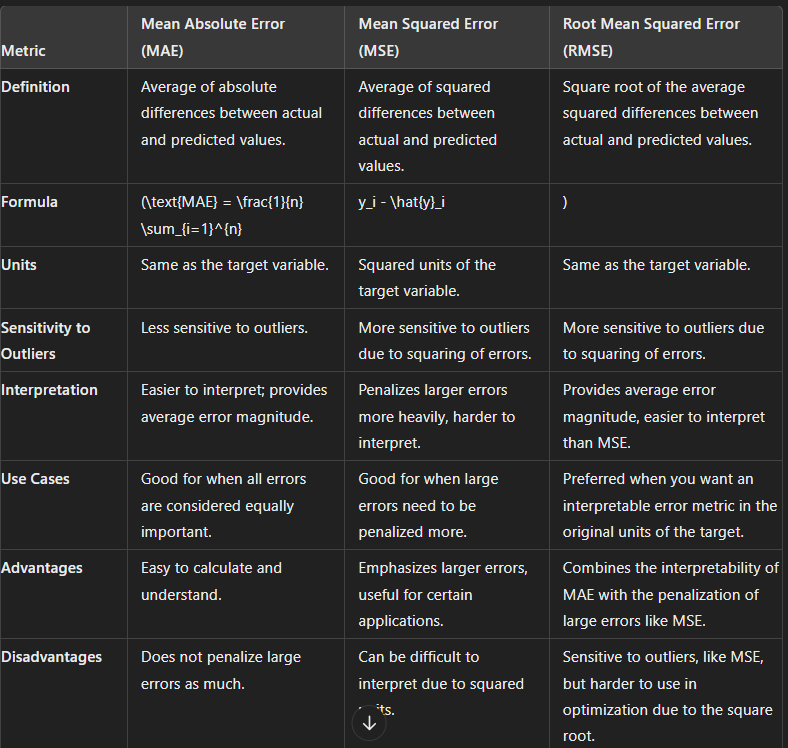




---



---



---



# 3: R-squared (Coefficient of Determination) and Adjusted R-squared


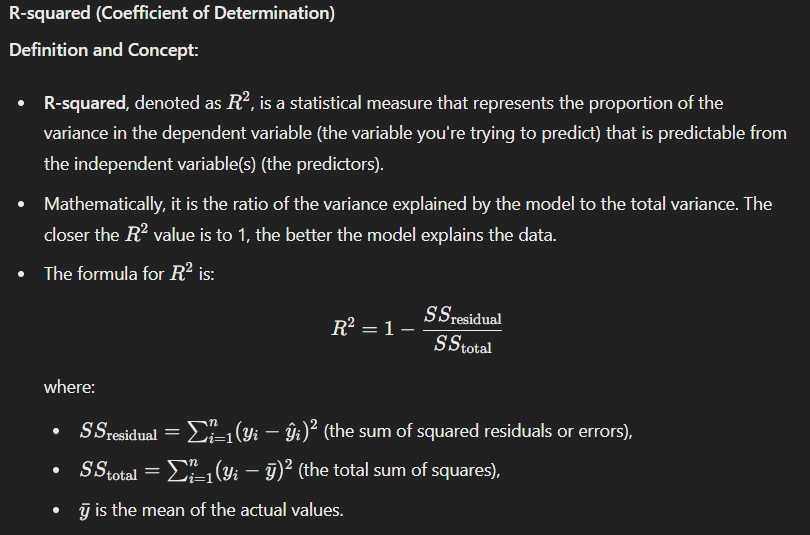

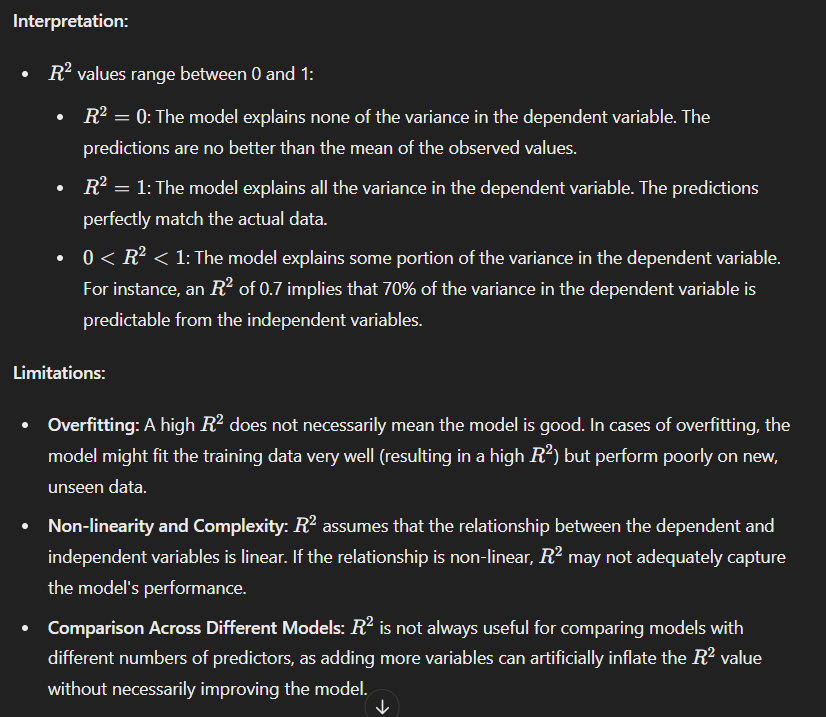





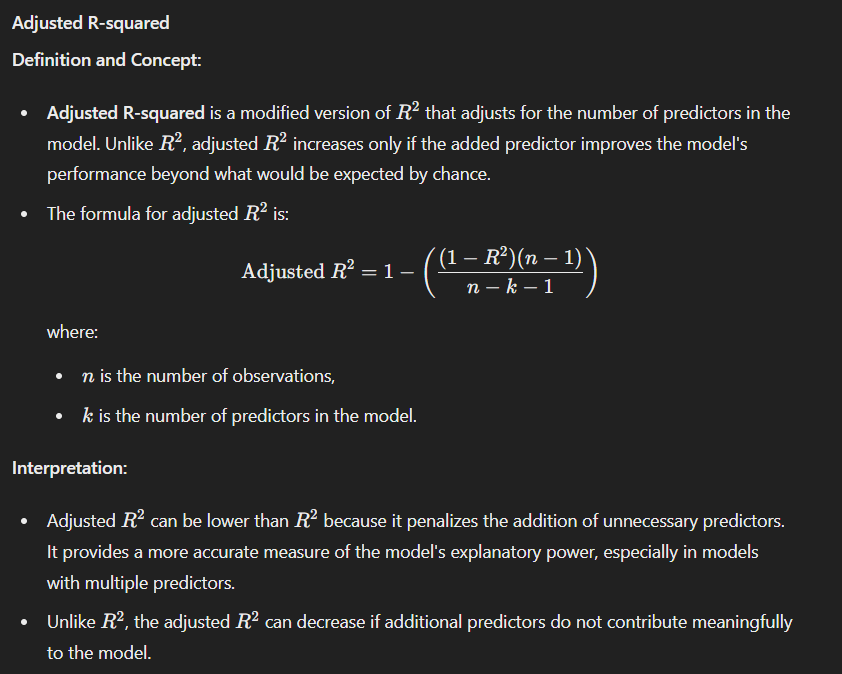


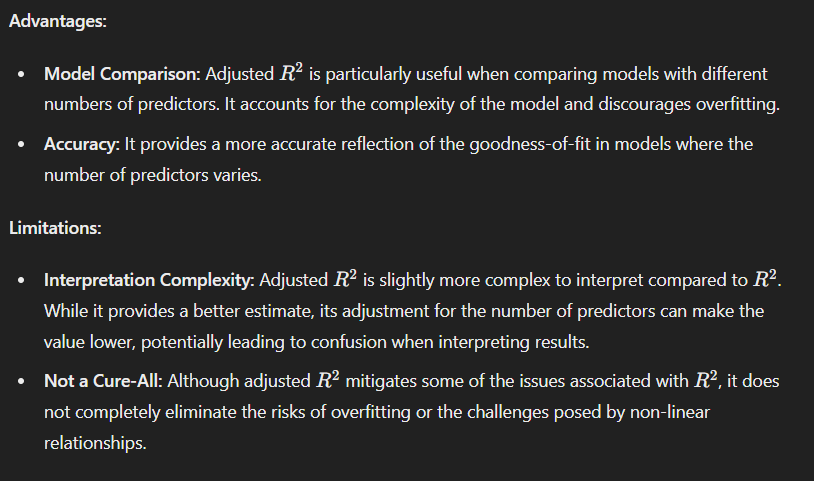


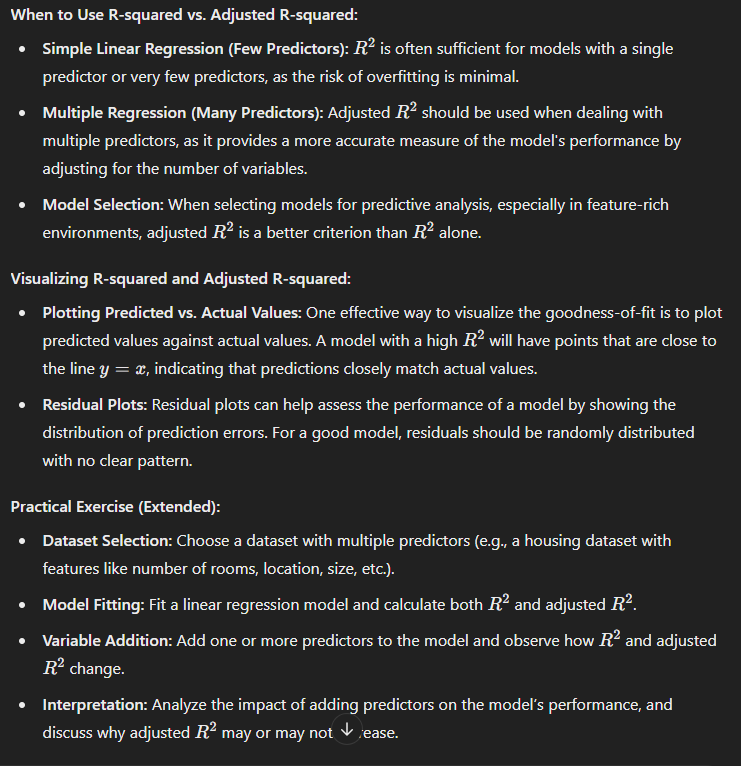





---



---



---



# 4 Mean Absolute Percentage Error (MAPE)

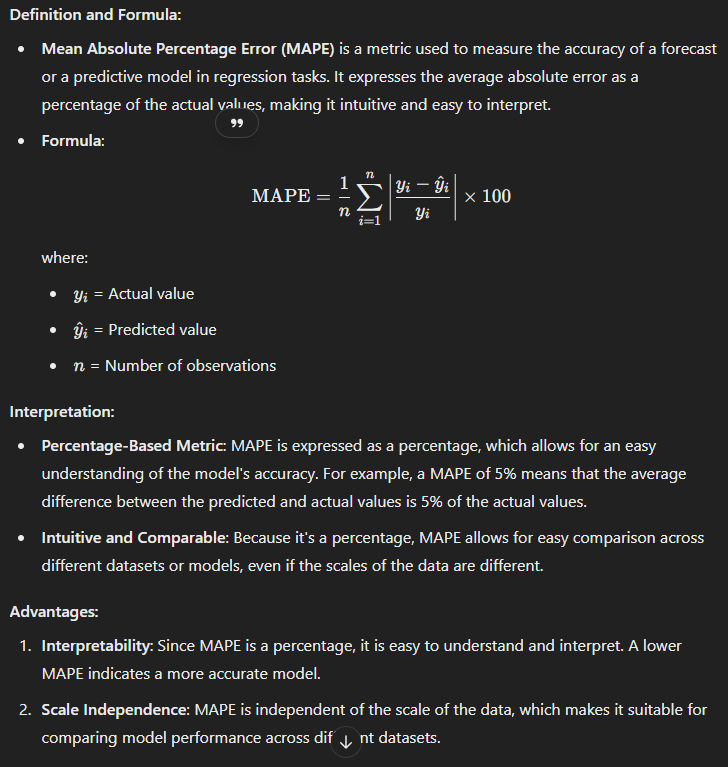

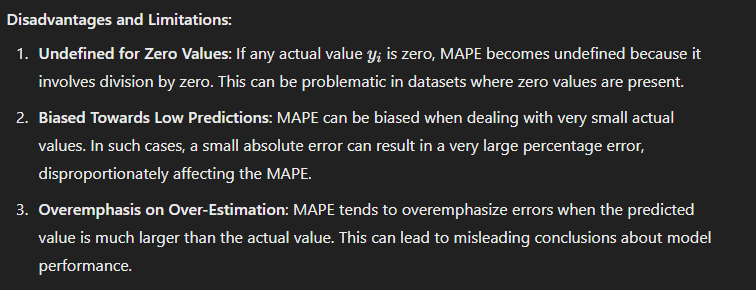

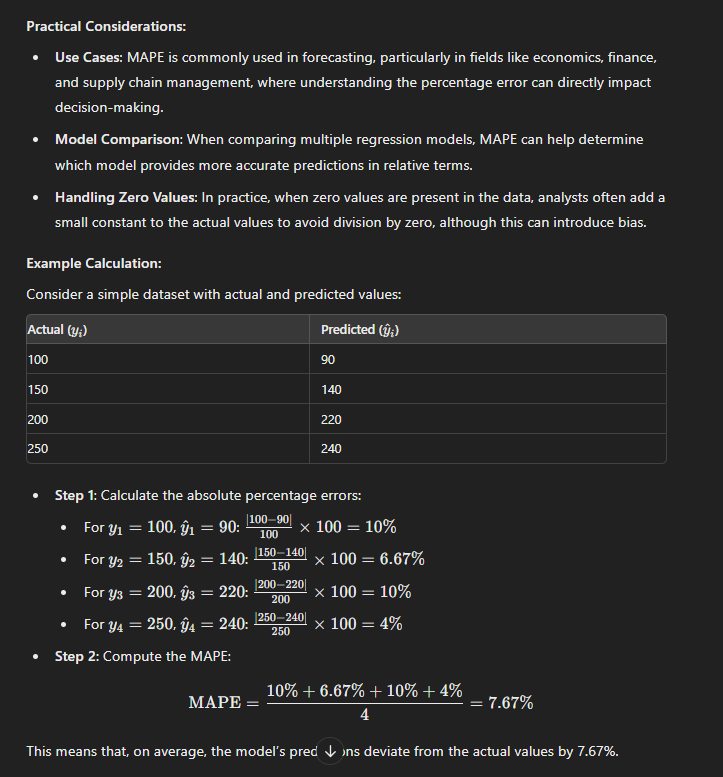



---



---



---



# Practical Demonstration

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Create a Sample Dataset
# Generate a synthetic regression dataset with 100 samples and 3 features.
# The 'noise' parameter adds a bit of random noise to the data, simulating real-world data imperfections.
# 'random_state=42' ensures that the same dataset is generated every time the code is run, for reproducibility.
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Splitting the dataset into training and testing sets
# The dataset is split into 80% training data and 20% testing data.
# 'train_test_split' randomly divides the data while ensuring reproducibility with 'random_state=42'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit a Linear Regression Model
# Instantiate a LinearRegression model object from scikit-learn.
model = LinearRegression()

# Train the model using the training data.
# The model learns the relationship between the input features (X_train) and the target variable (y_train).
model.fit(X_train, y_train)

# Make predictions on the test data.
# The model uses the learned parameters to predict target values for the input features in X_test.
y_pred = model.predict(X_test)

# 3. Mean Absolute Error (MAE)
# Calculate the Mean Absolute Error (MAE) between the predicted values and the actual values in the test set.
# MAE is the average of the absolute differences between the predicted and actual values.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 4. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
# Calculate the Mean Squared Error (MSE) between the predicted values and the actual values.
# MSE is the average of the squared differences between the predicted and actual values.
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE.
# RMSE is in the same units as the target variable and gives an indication of the magnitude of the error.
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 5. R-squared (R2)
# Calculate the R-squared value, which represents the proportion of variance in the target variable
# that is explained by the model's input features.
# R2 values range from 0 to 1, with 1 indicating perfect predictions.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

# 6. Adjusted R-squared
# Calculate the adjusted R-squared value, which adjusts the R-squared value based on the number of predictors.
# This metric is more informative when comparing models with different numbers of input features.
n = X_test.shape[0]  # number of observations (rows) in the test set
p = X_test.shape[1]  # number of predictors (features) in the test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

# 7. Mean Absolute Percentage Error (MAPE)
# Define a custom function to calculate the Mean Absolute Percentage Error (MAPE).
# MAPE expresses the error as a percentage of the actual values, providing a relative measure of accuracy.
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE using the custom function.
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Display Results
# Create a DataFrame to neatly organize and display the results of all calculated metrics.
results = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R-squared", "Adjusted R-squared", "MAPE"],
    "Value": [mae, mse, rmse, r2, adjusted_r2, mape]
})



Mean Absolute Error (MAE): 0.0896
Mean Squared Error (MSE): 0.0124
Root Mean Squared Error (RMSE): 0.1113
R-squared (R2): 1.0000
Adjusted R-squared: 1.0000
Mean Absolute Percentage Error (MAPE): 0.9551%


#  Comparison


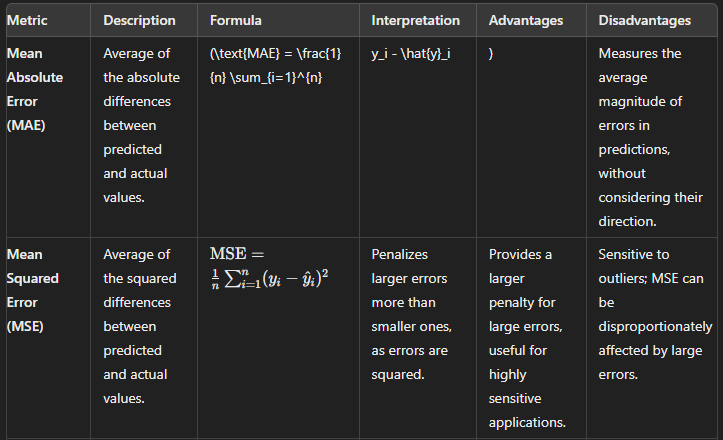

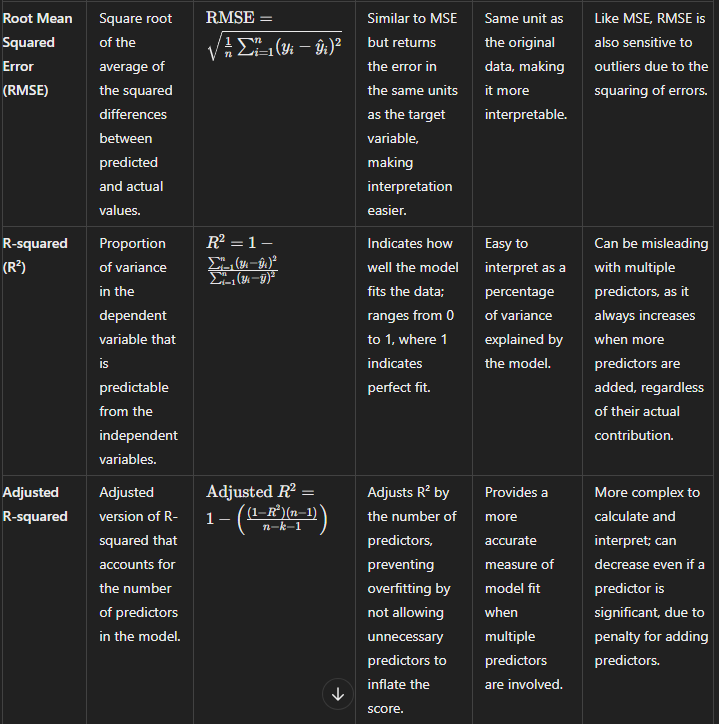

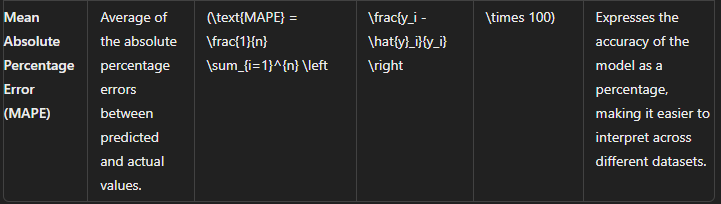

